In [32]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.colors

In [33]:
df = pd.read_excel("data/azeite.xlsx")

In [34]:
df

,Region,Segment,Category,Sub-Category,Sales
0,Input,Azeitona,Output,Azeite,1.00
1,Input,Electricidade,Output,Folhas,0.19
2,Input,Propano,Output,Caroço,0.54
3,Input,Diesel,Output,Bagaço Húmido,5.47
4,Input,Água,Output,CO2,3.26


In [35]:
cols = ["Region", "Segment", "Category", "Sub-Category"]

In [36]:
cols

['Region', 'Segment', 'Category', 'Sub-Category']

In [37]:
value = "Sales"

In [38]:
value_suffix = " Lit"

In [39]:
title = "Breakdown of Portuguese Olive Oil Production"

In [40]:
width, height = 700, 500

In [41]:
fontsize = 14

In [42]:
fontfamily = 'Time New Roman'

In [43]:
bgcolor = 'White'

In [44]:
link_capacity = 0.3

In [45]:
node_colors = px.colors.qualitative.G10

In [46]:
s = []

In [47]:
t = []

In [48]:
v = []

In [49]:
labels = np.unique(df[cols].values)

In [50]:
for i in range(len(cols) - 1):
    s.extend(df[cols[i]].tolist())
    t.extend(df[cols[i + 1]].tolist())
    v.extend(df[value].tolist())

In [51]:
links = pd.DataFrame({"source": s, "target": t, "value": v})

In [52]:
links

,source,target,value
0,Input,Azeitona,1.00
1,Input,Electricidade,0.19
2,Input,Propano,0.54
3,Input,Diesel,5.47
4,Input,Água,3.26
5,Azeitona,Output,1.00
6,Electricidade,Output,0.19
7,Propano,Output,0.54
8,Diesel,Output,5.47
9,Água,Output,3.26


In [53]:
links = links.groupby(["source","target"], as_index=False).agg({"value":"sum"})

In [54]:
links

,source,target,value
0,Azeitona,Output,1.00
1,Diesel,Output,5.47
2,Electricidade,Output,0.19
3,Input,Azeitona,1.00
4,Input,Diesel,5.47
5,Input,Electricidade,0.19
6,Input,Propano,0.54
7,Input,Água,3.26
8,Output,Azeite,1.00
9,Output,Bagaço Húmido,5.47


In [ ]:
#links.to_excel("links1.xlsx")

In [55]:
#read excel file

links = pd.read_excel('data/links1.xlsx')

In [56]:
links

,source,target,value
0,Azeitona,Output,1.00
1,Diesel,Output,5.47
2,Electricidade,Output,0.19
3,Input,Azeitona,1.00
4,Input,Diesel,5.47
5,Input,Electricidade,0.19
6,Input,Propano,0.54
7,Input,Água,3.26
8,Output,Azeite,1.00
9,Output,Bagaço Húmido,5.47


In [57]:
colors = [matplotlib.colors.to_rgb(i) for i in node_colors]

In [58]:
label_colors, links["link_c"] = [], 0

In [59]:
c, max_colors = 0, len(colors)

In [60]:
for l in range(len(labels)):
    
    label_colors.append(colors[c])
    
    link_color = colors[c] + (link_capacity,)
    
    links.loc[links.source == labels[l], ["link_c"]] = "rgba" + str(link_color)
    
    links = links.replace({labels[l]: l})
    
    if c == max_colors - 1:
        
        c = 0
        
    else:
        
        c += 1

In [61]:
label_colors = ["rgb" + str(i) for i in label_colors]

In [62]:
fig = go.Figure(
    data=[
        go.Sankey(
            valuesuffix=value_suffix, 
            node=dict(label=labels, color=label_colors),
            link=dict(
                source=links["source"], 
                target=links["target"], 
                value=links["value"], 
                color=links["link_c"],
            ),
        )
    ]
)


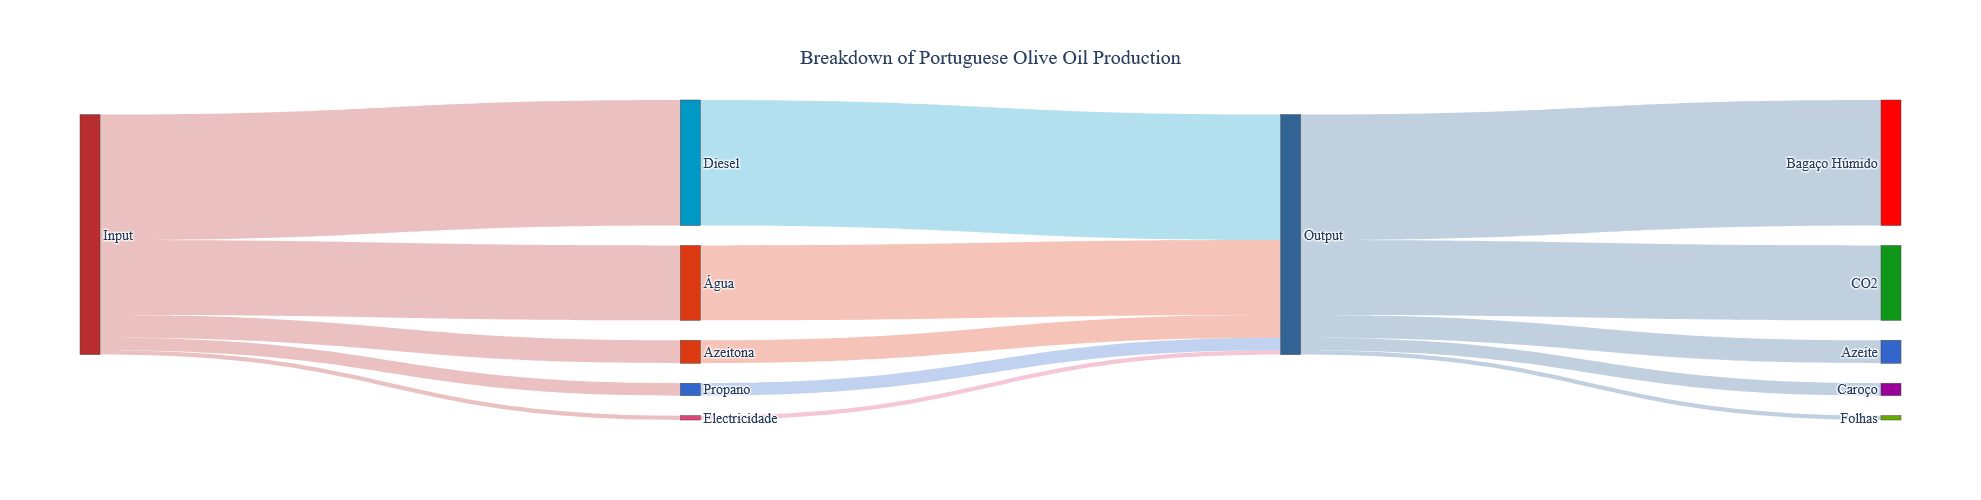

In [63]:
fig.update_layout(title_text=title,font_size=fontsize,font_family=fontfamily,width=width,height=height,paper_bgcolor= bgcolor,title={"y":0.9,"x":0.5,"xanchor":"center", "yanchor":"top"})

fig.show()